In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import tensorflow
im
import pandas as pd
import opendatasets as odport os
import shutil

In [45]:
from warnings import filterwarnings
filterwarnings('ignore')

In [46]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])


In [47]:
import pathlib
import zipfile
# test1 = zipfile.ZipFile('Training_data/test1.zip
# test1.extractal)
# train = zipfile.ZipFile('Training_data/train.z')
# train.extractall()

In [48]:
path = pathlib.Path("train")
new_dir = pathlib.Path("train_validation")


def seperating(subset_name, start, end):
    category = ["cat", "dog"]
    for k in category:
        dir = new_dir / subset_name / k
        try:
            os.makedirs(dir)
        except OSError:
            print(f"This file {dir} exist.")

        fnames = [f"{k}.{i}.jpg" for i in range(start, end)]
        for fname in fnames:
            shutil.copyfile(src=path / fname,
                            dst=dir / fname)


def seperating_val(subset_name, start, end):
    category = ["cat", "dog"]
    for k in category:
        dir = new_dir / subset_name / "item"
        try:
            os.makedirs(dir)
        except OSError:
            print(f"This file {dir} exist.")

        fnames = [f"{k}.{i}.jpg" for i in range(start, end)]
        for fname in fnames:
            print()
            shutil.copyfile(src=path / fname,
                            dst=dir / fname)


seperating_val("test1", start=0, end=200)
seperating("train", start=201, end=701)
seperating("test", start=800, end=900)


This file train_validation/test1/item exist.








































































































































































































This file train_validation/test1/item exist.








































































































































































































This file train_validation/train/cat exist.
This file train_validation/train/dog exist.
This file train_validation/test/cat exist.
This file train_validation/test/dog exist.


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('train_validation/train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('train_validation/test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('train_validation/test1',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)



Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 1 classes.


In [50]:
# %%capture
# classifier.fit_generator(train_set,
#                         steps_per_epoch=800, 
#                         epochs = 200,
#                         validation_data = test_set,
#                         validation_steps = 20, 
#                         #callbacks=[tensorboard]
#                         );

#Some Helpful Instructions:

#finetune you network parameter in last by using low learning rate like 0.00001
classifier.save('resources/dogcat_model_bak.h5')
from tensorflow.keras.models import load_model


In [51]:
from tensorflow.keras.models import load_model
classifier = load_model('dogcat_model_bak.h5')

### Prediction of Single Image

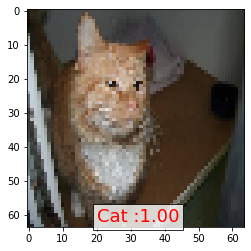

In [52]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('train_validation/test/cat/cat.803.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()


In [55]:

import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

In [56]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,cat/cat.800.jpg,0.00000,0,0
1,cat/cat.801.jpg,0.00000,0,0
2,cat/cat.802.jpg,0.00000,0,0
3,cat/cat.803.jpg,0.00000,0,0
4,cat/cat.804.jpg,0.00000,0,0
5,cat/cat.805.jpg,0.00045,0,0
6,cat/cat.806.jpg,0.00000,0,0
7,cat/cat.807.jpg,0.00000,0,0
8,cat/cat.808.jpg,0.00000,0,0
9,cat/cat.809.jpg,0.00014,0,0


In [57]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 2


In [58]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

ModuleNotFoundError: No module named 'sklearn'

In [213]:
classifier.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_7 (Dense)              (None, 1)               

train_validation


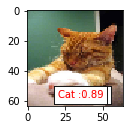

In [95]:
fig = plt.figure(figsize=(15, 6))
columns = 7
rows = 3
results =

import glob
txtfiles = []
print(new_dir)
file_list=os.listdir(r"train_validation/test1/item")
k = 0
 []
for ifile_list:
    fi   fig.add_subplot(rows, colukns, i+1)
    img1 = image.load_img('train_validation/item/tes i(200))], target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    # gives all class prob.
    prediction = classifier.predict(img, batch_size=None, steps=1)
    if(prediction[:, :] > 0.5):
        value = 'Dog :%1.2f' % (prediction[0, 0])
        plt.text(20, 58, value, color='red', fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.8))
      [iset1.filenames[i], "Dog"])
    else:
        value = 'Cat :%1.2f' % (1.0-prediction[0, 0])
        plt.text(20, 58, value, color='red', fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.8))
 [itest_set1.filenames[i], "Cat"])
    plt.imshow(img1)


In [96]:

results


[['cat.27.jpg', 'Cat'],
 ['dog.149.jpg', 'Dog'],
 ['cat.139.jpg', 'Cat'],
 ['cat.12.jpg', 'Cat'],
 ['cat.54.jpg', 'Cat'],
 ['cat.149.jpg', 'Dog'],
 ['cat.114.jpg', 'Dog'],
 ['dog.31.jpg', 'Dog'],
 ['cat.6.jpg', 'Dog'],
 ['cat.159.jpg', 'Cat'],
 ['cat.36.jpg', 'Cat'],
 ['dog.13.jpg', 'Dog'],
 ['dog.52.jpg', 'Dog'],
 ['cat.72.jpg', 'Cat'],
 ['cat.8.jpg', 'Cat'],
 ['cat.70.jpg', 'Cat'],
 ['cat.130.jpg', 'Cat'],
 ['cat.192.jpg', 'Cat'],
 ['dog.177.jpg', 'Dog'],
 ['dog.91.jpg', 'Dog'],
 ['dog.92.jpg', 'Dog'],
 ['cat.142.jpg', 'Cat'],
 ['cat.116.jpg', 'Cat'],
 ['cat.128.jpg', 'Cat'],
 ['cat.165.jpg', 'Cat'],
 ['cat.50.jpg', 'Cat'],
 ['dog.160.jpg', 'Dog'],
 ['cat.93.jpg', 'Cat'],
 ['dog.55.jpg', 'Dog'],
 ['cat.104.jpg', 'Cat'],
 ['dog.23.jpg', 'Dog'],
 ['cat.161.jpg', 'Cat'],
 ['dog.59.jpg', 'Dog'],
 ['cat.166.jpg', 'Dog'],
 ['dog.169.jpg', 'Dog'],
 ['cat.103.jpg', 'Cat'],
 ['dog.34.jpg', 'Dog'],
 ['cat.41.jpg', 'Cat'],
 ['cat.173.jpg', 'Cat'],
 ['cat.181.jpg', 'Cat'],
 ['cat.55.jpg', 'Cat']